<a href="https://colab.research.google.com/github/automatics4you2/machine_learning_bootcamp/blob/main/OCR_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import keras as kr
print("Keras:", kr.__version__)

TensorFlow version: 2.15.0
Keras: 2.15.0


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)




In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

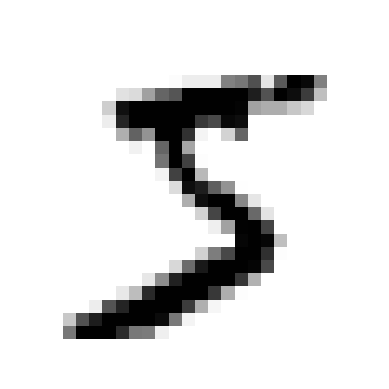

In [ ]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

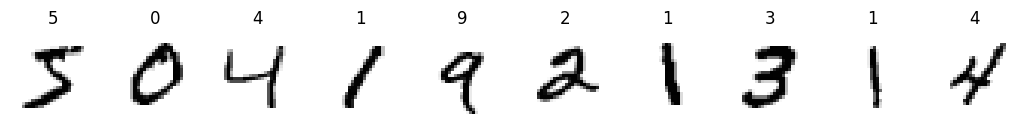

In [ ]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=12)
plt.show()

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer= kr.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0682 - accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0589 - accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0541 - accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0475 - accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0401 - accuracy: 0.9860
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0375 - accuracy: 0.9876
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0343 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.032

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.068231,0.978233
1,0.058911,0.981383
2,0.054149,0.982483
3,0.047547,0.984750
4,0.046376,0.984567
5,0.042080,0.985783
6,0.040089,0.985983
7,0.037512,0.987617
8,0.034308,0.988017
9,0.032835,0.988967


In [ ]:
from matplotlib import pyplot as plt
metrics['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

In [ ]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[0.000000000153, 0.000000000001, 0.000000000034, ..., 0.99999994    , 0.000000000089, 0.00000002137 ],
       [0.            , 0.000000011882, 0.99999994    , ..., 0.            , 0.000000000001, 0.            ],
       [0.000000092823, 0.9994701     , 0.000040361756, ..., 0.000468134   , 0.000013631769, 0.000000038075],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000730438, 0.00000005152 , 0.000002590641],
       [0.000000000004, 0.000000000004, 0.            , ..., 0.000000017309, 0.000014605161, 0.000000000004],
       [0.            , 0.            , 0.000000000317, ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes


313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(predicted_classes, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [ ]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([115, 247, 321, 340, 381, 445, 582, 613, 659, 684], dtype='int64')

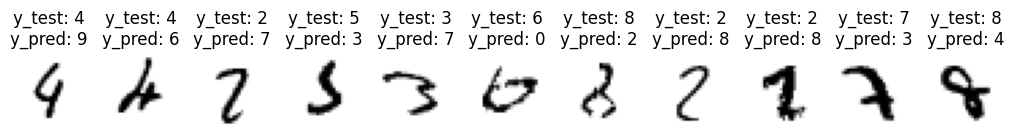

In [ ]:
plt.figure(figsize=(14, 14))
for i, j in zip(range(1, 12), misclassified.index[:12]):
    plt.subplot(1, 12, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(predicted_classes[j]), color='black', fontsize=12)
plt.show()